In [1]:
#Installing libraries
import pandas as pd

df= pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\Retail_Data_Transactions.csv')

In [2]:
trxn= pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\Retail_Data_Transactions.csv')

In [3]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-02-2013,35
1,CS4768,15-03-2015,39
2,CS2122,26-02-2013,52
3,CS1217,16-11-2011,99
4,CS1850,20-11-2013,78
...,...,...,...
124995,CS8433,26-06-2011,64
124996,CS7232,19-08-2014,38
124997,CS8731,28-11-2014,42
124998,CS8133,14-12-2013,13


In [4]:
response= pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [5]:
df= trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-02-2013,35,1.0
1,CS4768,15-03-2015,39,1.0
2,CS2122,26-02-2013,52,0.0
3,CS1217,16-11-2011,99,0.0
4,CS1850,20-11-2013,78,0.0
...,...,...,...,...
124995,CS8433,26-06-2011,64,0.0
124996,CS7232,19-08-2014,38,0.0
124997,CS8731,28-11-2014,42,0.0
124998,CS8133,14-12-2013,13,0.0


In [6]:
#features

df.dtypes
df.shape
df.head()
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-06-2011,64,0.0
124996,CS7232,19-08-2014,38,0.0
124997,CS8731,28-11-2014,42,0.0
124998,CS8133,14-12-2013,13,0.0
124999,CS7996,13-12-2014,36,0.0


In [7]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [8]:
#MISSING VALUES

df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [9]:
(31/123000) *100

0.025203252032520326

In [10]:
df=df.dropna()

In [11]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-02-2013,35,1.0
1,CS4768,15-03-2015,39,1.0
2,CS2122,26-02-2013,52,0.0
3,CS1217,16-11-2011,99,0.0
4,CS1850,20-11-2013,78,0.0
...,...,...,...,...
124995,CS8433,26-06-2011,64,0.0
124996,CS7232,19-08-2014,38,0.0
124997,CS8731,28-11-2014,42,0.0
124998,CS8133,14-12-2013,13,0.0


In [39]:
#change dtypes

df.loc[:, 'trans_date']=pd.to_datetime(df['trans_date'], format='%d-%m-%Y', errors='coerce')
df.loc[:, 'response']= df['response'].astype('int64')

In [40]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [41]:
set(df['response'])

{0, 1}

In [42]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
month                   int32
month_year          period[M]
dtype: object

In [43]:
#check for outiers
#z-score

from scipy import stats
import numpy as np

#calc z score
z_scores= np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold= 3

outliers= z_scores>threshold

print(df[outliers])



Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response, month, month_year]
Index: []


In [44]:
#check for outiers
#z-score

from scipy import stats
import numpy as np

#calc z score
z_scores= np.abs(stats.zscore(df['response']))

#set a threshold

threshold= 3

outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response, month, month_year]
Index: []


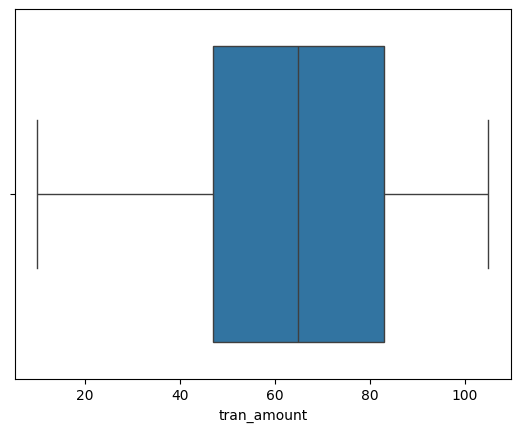

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [46]:
df['month']= df['trans_date'].dt.month

C:\Users\Taniya Gupta\AppData\Local\Temp\ipykernel_16884\3457190984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


In [47]:

df['trans_date']= pd.to_datetime(df['trans_date'])

df['month']= df['trans_date'].dt.month

#which 3 months have had the highest transaction amount?

monthly_sales= df.groupby('month')['tran_amount'].sum()
monthly_sales= monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

C:\Users\Taniya Gupta\AppData\Local\Temp\ipykernel_16884\795941746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\Taniya Gupta\AppData\Local\Temp\ipykernel_16884\795941746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [48]:
# Customers having highest num of orders

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts

#sort

top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
4,CS1215,35
3,CS3805,35


In [49]:
import seaborn as sns

<Axes: xlabel='customer_id', ylabel='count'>

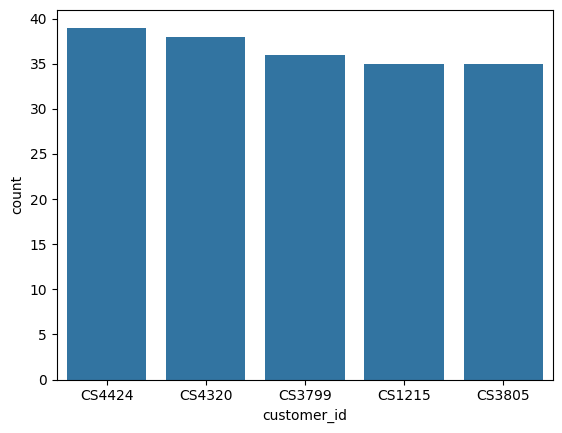

In [50]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [51]:
# Customers having highest value of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()

customer_sales

#sort

top_5_sales= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

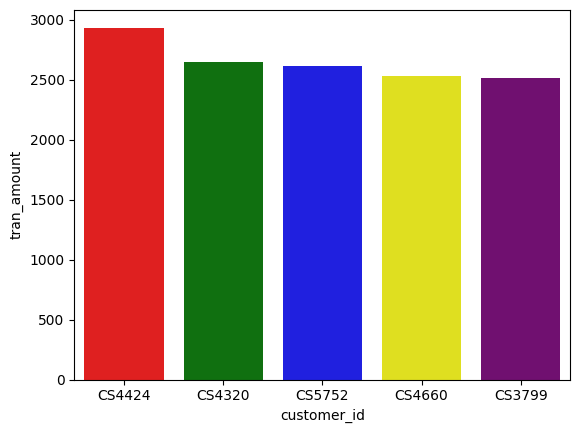

In [52]:
colors = ['red', 'green', 'blue', 'yellow', 'purple']
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sales, palette=colors, hue='customer_id', legend=False)


ADVANCED ANALYTICS

Time Series Analysis

C:\Users\Taniya Gupta\AppData\Local\Temp\ipykernel_16884\3821398220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


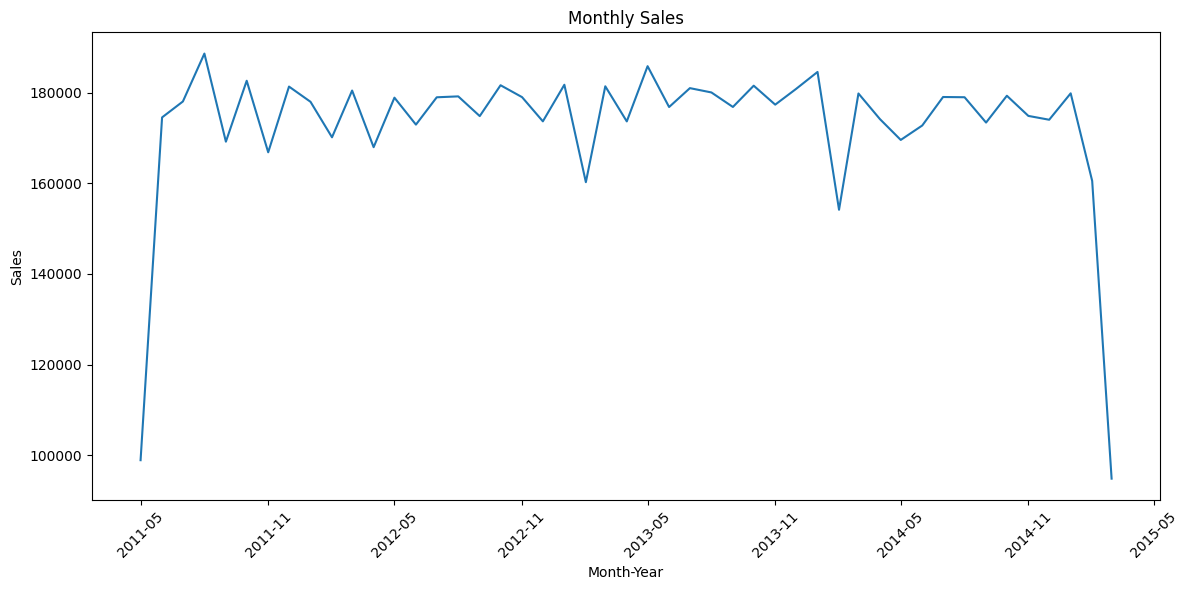

In [53]:

import matplotlib.dates as mdates
df['month_year']= df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cohort Segmentation

In [54]:
#Recency
recency= df.groupby('customer_id')['trans_date'].max()

#frequency
frequency= df.groupby('customer_id')['trans_date'].count()

#Monetary
monetary= df.groupby('customer_id')['tran_amount'].sum()

#Combine
rfm= pd.DataFrame({'recency':recency, 'frequency':frequency, 'monetary':monetary})


In [55]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [56]:
#Customer Segmentation

def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'p0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'p1'
    else:
        return 'p2'

rfm['segment']= rfm.apply(segment_customer, axis=1)

In [57]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,p0
CS1113,2015-02-09,20,1490,p0
CS1114,2015-02-12,19,1432,p0
CS1115,2015-03-05,22,1659,p0
CS1116,2014-08-25,13,857,p2
...,...,...,...,...
CS8996,2014-12-09,13,582,p2
CS8997,2014-06-28,14,543,p2
CS8998,2014-12-22,13,624,p2


Churn Analysis

<Axes: xlabel='response'>

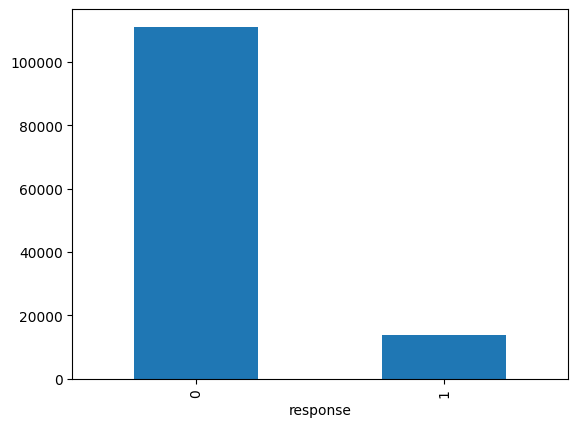

In [58]:
#Count the numbers of churned and active customers
churn_counts= df['response'].value_counts()

#Plot
churn_counts.plot(kind='bar')

Analyzing Top Customers

<Axes: xlabel='month_year'>

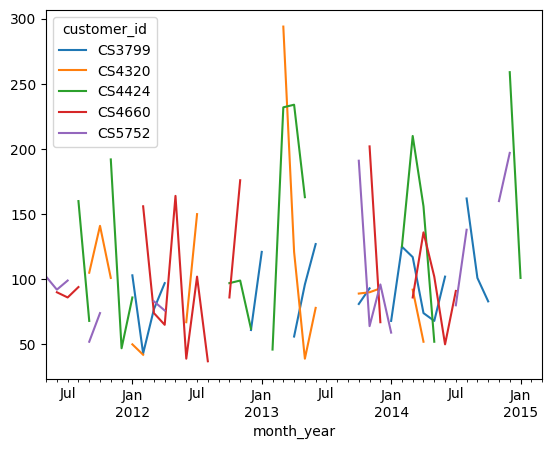

In [59]:
top_5_cus= monetary.sort_values(ascending=False).head(5).index

top_customers_df= df[df['customer_id'].isin(top_5_cus)]

top_customer_sales= top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [60]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [37]:
df.to_csv('MainData.csv')

In [ ]:
rfm.to_csv('AddAnlys.csv')